In [182]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
file = pd.read_csv('C:/Users/ASUS/Desktop/Chocolate.csv')
# Tên các thuộc tính: thay các dấu space thành dâu _ để dễ xử lý

In [184]:
file.head(5)

,Company_(Maker_if_known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [185]:
file.info()
# Nhận thấy có 2 giá trị NaN trong Bean_Type và Broad_Bean_Origin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company_(Maker_if_known)            1795 non-null object
Specific_Bean_Origin_or_Bar_Name    1795 non-null object
REF                                 1795 non-null int64
Review_Date                         1795 non-null int64
Cocoa_Percent                       1795 non-null object
Company_Location                    1795 non-null object
Rating                              1795 non-null float64
Bean_Type                           1794 non-null object
Broad_Bean_Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [186]:
file['Bean_Type'].isna().sum()
# có 1 giá trị null

1

In [187]:
file['Broad_Bean_Origin'].isna().sum()
# có 1 giá trị null

1

In [188]:
file[file['Bean_Type'].isna()==True]
# xóa dòng có giá trị NaN vì số lượng không đáng kể
file = file[file['Bean_Type'].isna()==False]

In [189]:
file[file['Broad_Bean_Origin'].isna()]
# xóa dòng có giá trị NaN
file = file[file['Broad_Bean_Origin'].isna()==False]

In [190]:
file.info()
# sau khi xóa NaN thì các giá trị còn lại đều đầy đủ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
Company_(Maker_if_known)            1793 non-null object
Specific_Bean_Origin_or_Bar_Name    1793 non-null object
REF                                 1793 non-null int64
Review_Date                         1793 non-null int64
Cocoa_Percent                       1793 non-null object
Company_Location                    1793 non-null object
Rating                              1793 non-null float64
Bean_Type                           1793 non-null object
Broad_Bean_Origin                   1793 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 140.1+ KB


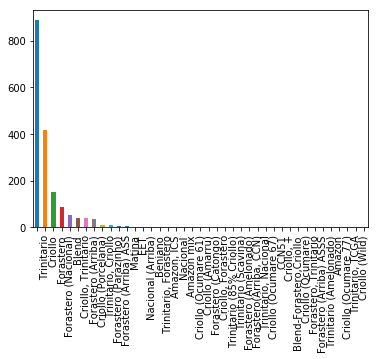

In [191]:
file['Bean_Type'].value_counts().plot(kind='bar')
# có quá nhiều giá trị trống# chưa biết Bean_Type đó

In [192]:
# thay những vị trí chưa biết bằng Unknow
file = file.replace('\xa0','Unknow')


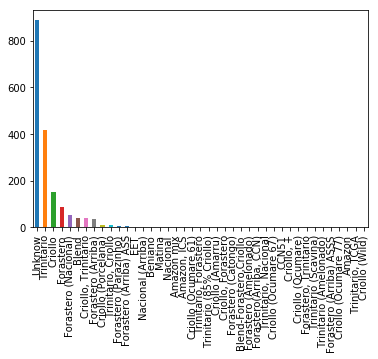

In [193]:
file['Bean_Type'].value_counts().plot(kind = 'bar')

In [194]:
bean_type = file.Bean_Type.unique()
bean_type

array(['Unknow', 'Criollo', 'Trinitario', 'Forastero (Arriba)',
       'Forastero', 'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [195]:
# chuyển kiểu dữ liệu từ string về float của 'Cocoa_percent' và chuẩn hóa về các khoảng cách nhau 5 đơn vị
file['Cocoa_Percent'] = file.Cocoa_Percent.replace({'%':''},regex=True)
cocoa_percent = []
for i in file['Cocoa_Percent']:
  cocoa_percent.append(round(float(i)/5+0.5)*5)
cocoa_percent
file['Cocoa_Percent'] = cocoa_percent

In [196]:
file['Cocoa_Percent'].value_counts()

70     856
80     368
75     315
60      70
65      69
90      56
85      30
100     22
95       3
50       2
55       1
45       1
Name: Cocoa_Percent, dtype: int64

In [181]:
rating = []
for i in file['Rating']:
  if i<3:
    rating.append("Low quality")
  else:
    rating.append("High quality")
rating
file['Rating'] = rating
# gán nhãn Low và Hight cho Rating

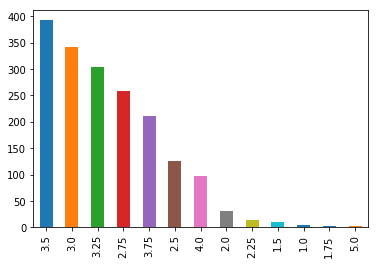

In [197]:
file['Rating'].value_counts().plot(kind = 'bar')
# so sánh các số lượng giá trị của Rating 

In [198]:
file['Specific_Bean_Origin_or_Bar_Name'].value_counts()

Madagascar                                       56
Peru                                             45
Ecuador                                          42
Dominican Republic                               37
Venezuela                                        21
Sambirano                                        19
Chuao                                            19
Ocumare                                          17
Papua New Guinea                                 15
Ghana                                            15
Belize                                           13
Bolivia                                          12
Grenada                                          11
Porcelana                                        11
Brazil                                           11
Trinidad                                         11
Tanzania                                         11
La Red                                           11
Costa Rica                                       11
Maya Mountai

In [199]:
file['Cocoa_Percent'].value_counts()

70     856
80     368
75     315
60      70
65      69
90      56
85      30
100     22
95       3
50       2
55       1
45       1
Name: Cocoa_Percent, dtype: int64

In [200]:
file['Company_Location'].value_counts()

U.S.A.               763
France               156
Canada               124
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
New Zealand           17
Japan                 17
Madagascar            17
Brazil                17
Peru                  17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Israel                 9
Argentina              9
Costa Rica             9
Poland                 8
Lithuania              6
Honduras               6
Sweden                 5
Nicaragua              5
South Korea            5
Domincan Republic      5
Amsterdam              4
Sao Tome               4
Netherlands            4
Fiji                   4
Mexico                 4
Ireland                4


In [201]:
rating = file['Rating'].value_counts()
rating

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    126
4.00     97
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64

In [202]:
file['Broad_Bean_Origin'].value_counts()
# có những dòng có nhiều giá trị

Venezuela                       214
Ecuador                         193
Peru                            165
Madagascar                      145
Dominican Republic              141
Unknow                           73
Nicaragua                        60
Brazil                           58
Bolivia                          57
Belize                           49
Papua New Guinea                 42
Colombia                         40
Vietnam                          38
Costa Rica                       38
Tanzania                         34
Ghana                            33
Trinidad                         33
Mexico                           30
Guatemala                        28
Hawaii                           28
Domincan Republic                25
Jamaica                          20
Grenada                          19
Indonesia                        16
Honduras                         15
Cuba                             11
Congo                            10
Sao Tome                    

In [203]:
where = file['Broad_Bean_Origin']
where.value_counts()

Venezuela                       214
Ecuador                         193
Peru                            165
Madagascar                      145
Dominican Republic              141
Unknow                           73
Nicaragua                        60
Brazil                           58
Bolivia                          57
Belize                           49
Papua New Guinea                 42
Colombia                         40
Vietnam                          38
Costa Rica                       38
Tanzania                         34
Ghana                            33
Trinidad                         33
Mexico                           30
Guatemala                        28
Hawaii                           28
Domincan Republic                25
Jamaica                          20
Grenada                          19
Indonesia                        16
Honduras                         15
Cuba                             11
Congo                            10
Sao Tome                    

In [204]:
where = file['Broad_Bean_Origin']
j = 0
for i in where:
    if ',' in i:
        where[j] = 'anywhere'
    j= j+1

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [205]:
file[file['Broad_Bean_Origin']=='anywhere']

,Company_(Maker_if_known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
197,Bittersweet Origins,2009 Hapa Nibby,502,2010,70,U.S.A.,3.75,Blend,anywhere
224,Bonnat,Surfin,1418,2014,70,France,3.75,Unknow,anywhere
509,DAR,"DUO, batch 002",1920,2016,70,U.S.A.,3.25,Unknow,anywhere
629,Escazu,"Carenero, Guapiles, Ocumare blend",431,2009,75,U.S.A.,2.75,Unknow,anywhere
631,Ethel's Artisan (Mars),"Peru, Madagascar",666,2011,60,U.S.A.,2.50,Unknow,anywhere
635,Ethel's Artisan (Mars),"Venezuela, Trinidad",672,2011,65,U.S.A.,2.50,Unknow,anywhere
746,Guido Castagna,Trinidad & Tobago,355,2009,65,Italy,3.00,Unknow,anywhere
748,Guido Castagna,Blend,355,2009,65,Italy,3.25,Unknow,anywhere
783,Haigh,South America and Africa,701,2011,70,Australia,3.00,Unknow,anywhere
930,La Maison du Chocolat (Valrhona),"Cuana, 2013",1121,2013,75,France,2.75,Unknow,anywhere


In [206]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
Company_(Maker_if_known)            1793 non-null object
Specific_Bean_Origin_or_Bar_Name    1793 non-null object
REF                                 1793 non-null int64
Review_Date                         1793 non-null int64
Cocoa_Percent                       1793 non-null int64
Company_Location                    1793 non-null object
Rating                              1793 non-null float64
Bean_Type                           1793 non-null object
Broad_Bean_Origin                   1793 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 220.1+ KB


In [207]:
file

,Company_(Maker_if_known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,65,France,3.75,Unknow,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,Unknow,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,Unknow,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,Unknow,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,Unknow,Peru
5,A. Morin,Carenero,1315,2014,70,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70,France,3.50,Unknow,Cuba
7,A. Morin,Sur del Lago,1315,2014,70,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70,France,4.00,Unknow,Peru


In [208]:
file['Specific_Bean_Origin_or_Bar_Name']

0                              Agua Grande
1                                    Kpime
2                                   Atsane
3                                    Akata
4                                   Quilla
5                                 Carenero
6                                     Cuba
7                             Sur del Lago
8                           Puerto Cabello
9                                  Pablino
10                                  Panama
11                              Madagascar
12                                  Brazil
13                                Equateur
14                                Colombie
15                                Birmanie
16                        Papua New Guinea
17                                   Chuao
18                                   Piura
19                    Chanchamayo Province
20                    Chanchamayo Province
21                                 Bolivia
22                                    Peru
23         

In [209]:
file.to_csv(r'C:/Users/ASUS/Desktop/Chocolate_ok.csv')
# xuất ra file csv để load lên datastudio.google.com